# Practice Project - 3

Red Wine Quality Prediction
Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

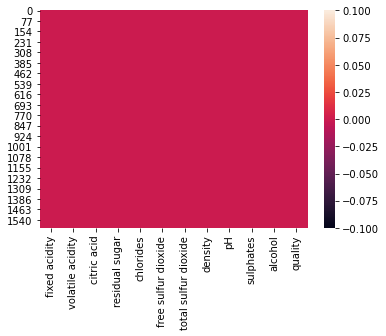

In [6]:
sns.heatmap(df.isnull())

# EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

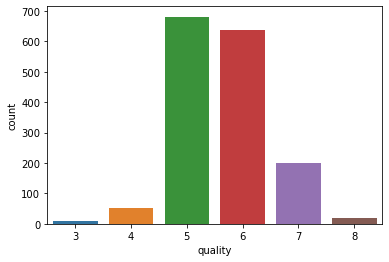

In [7]:
sns.countplot(x=df["quality"])

In [8]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Most wines are of quality 5 and 6

In [9]:
y=df["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

ASSIGN VALUES

In [10]:
y_new=np.where((y==3)| (y==4)|(y==5),0,y)
y_new=np.where((y==5)|(y==6),1,y_new)
y_new=np.where((y==7)|(y==8),2,y_new)
df_y=pd.Series(y_new)
df_y.index=y.index
y=df_y
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Length: 1599, dtype: int64

In [11]:
y.value_counts()

1    1319
2     217
0      63
dtype: int64

In [12]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Length: 1599, dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

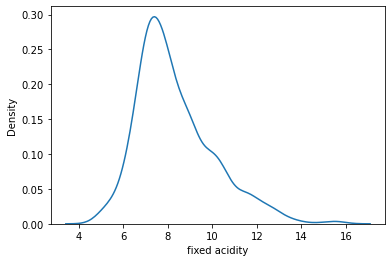

In [13]:
sns.kdeplot(x=df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>

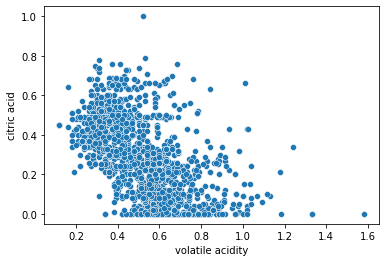

In [14]:
sns.scatterplot(x="volatile acidity",y="citric acid",data=df)

<AxesSubplot:ylabel='residual sugar'>

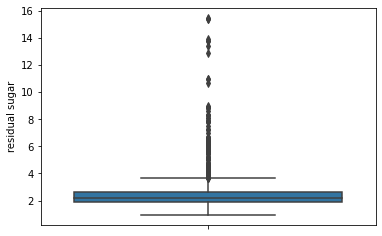

In [15]:
sns.boxplot(y="residual sugar",data=df)

<AxesSubplot:ylabel='chlorides'>

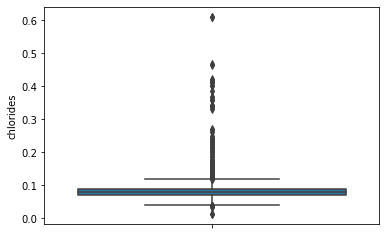

In [16]:
sns.boxplot(y="chlorides",data=df)

<AxesSubplot:ylabel='count'>

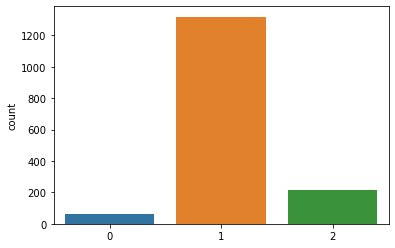

In [17]:
sns.countplot(x=y)

# CORRELATION

In [18]:
df["quality"]=y
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.125886
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.333816
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.228930
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.030153
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.098829
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.025075
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.081960
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.123566
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.093946
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.205409


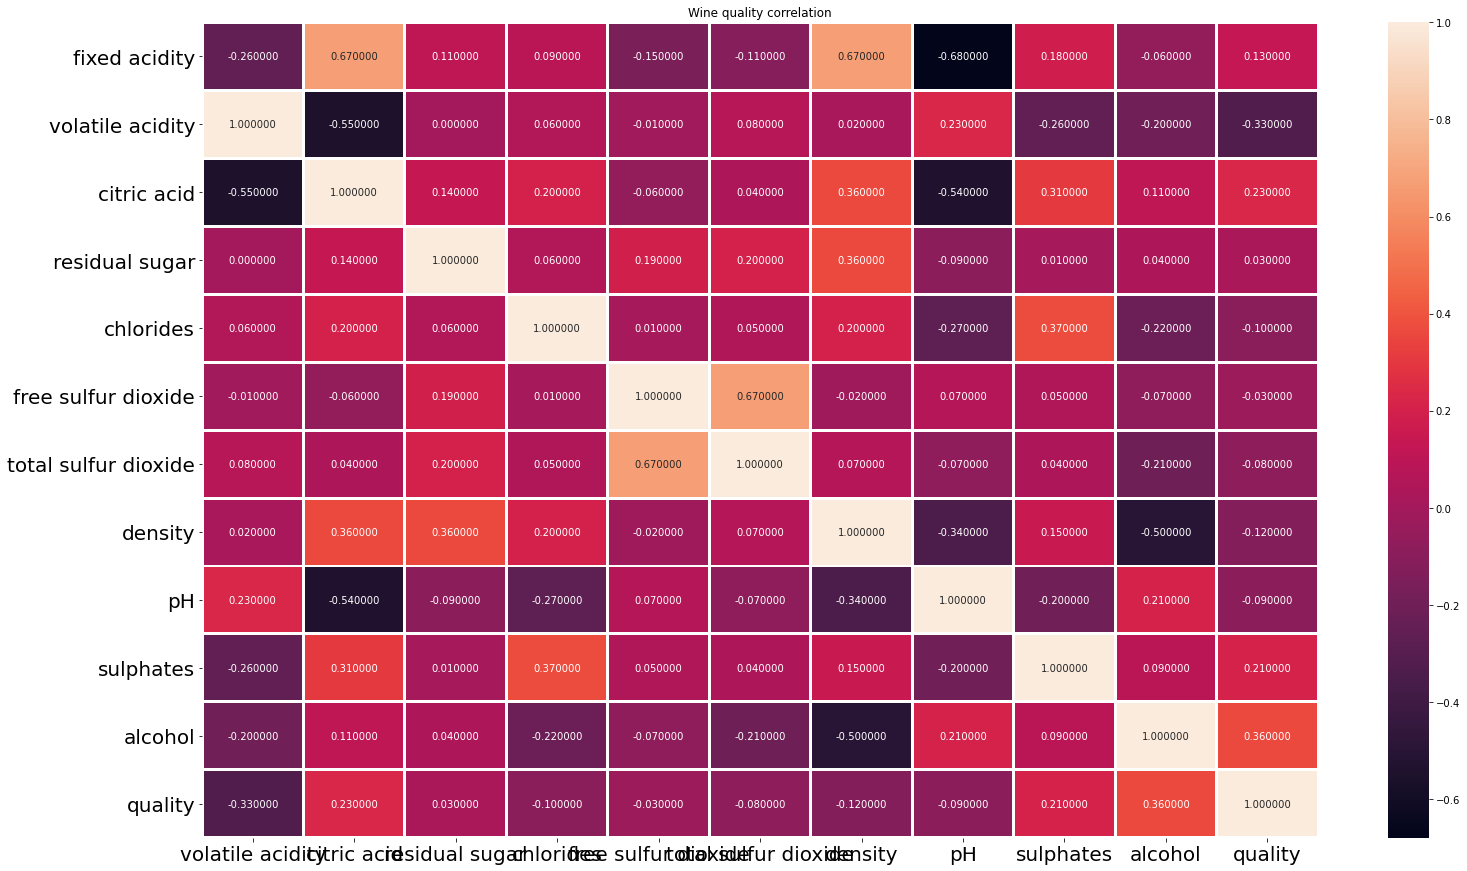

In [20]:


plt.figure(figsize=(25,15))
sns.heatmap(round(df.corr()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Wine quality correlation")
plt.show()



 multi-colinearity present

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [22]:
c_vif(x)

,variables,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


Very high VIF values proving multi-colinearity.

In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# outliers and Skewness

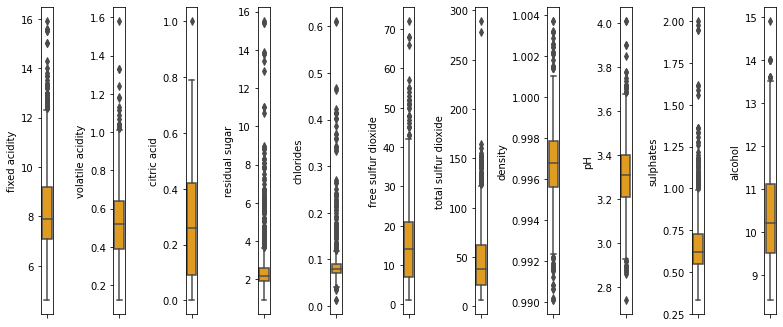

In [25]:
collist=x.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=x[collist[i]],color="orange",orient="v")
    plt.tight_layout()



In [26]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

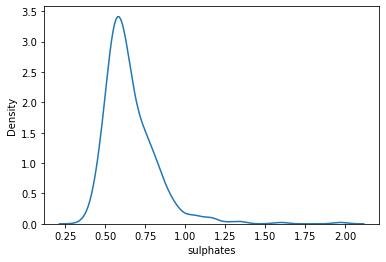

In [27]:
sns.kdeplot(x="sulphates", data=df)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

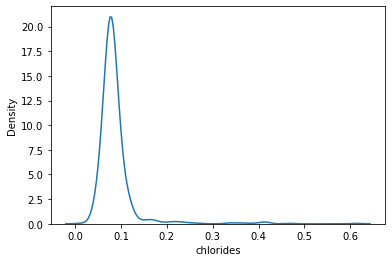

In [28]:
sns.kdeplot(x="chlorides", data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

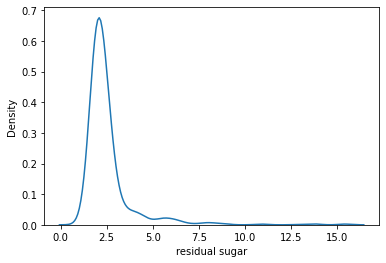

In [29]:
sns.kdeplot(x="residual sugar", data=df)

In [30]:
import numpy as np 

df["chlorides"]=np.sqrt(df["chlorides"])
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               3.708789
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.704067
dtype: float64

In [31]:
df.iloc[:,:-1]=np.sqrt(df.iloc[:,:-1])
df.skew()

fixed acidity           0.685006
volatile acidity        0.108355
citric acid            -0.533799
residual sugar          2.956763
chlorides               2.735462
free sulfur dioxide     0.483344
total sulfur dioxide    0.640439
density                 0.067136
pH                      0.098786
sulphates               1.554542
alcohol                 0.758751
quality                 0.704067
dtype: float64

data cleaning

In [32]:

df=df.drop(["pH"],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [34]:
x=df.iloc[:,:-1]
c_vif(x)  #checking VIF values

,variables,VIF
0,fixed acidity,181.995987
1,volatile acidity,63.298252
2,citric acid,13.702553
3,residual sugar,24.818908
4,chlorides,169.468030
5,free sulfur dioxide,24.165362
6,total sulfur dioxide,24.770037
7,density,1081.618362
8,sulphates,92.780595
9,alcohol,510.939550


In [35]:
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))
z.shape

(1599, 11)

In [36]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 11)
(1491, 11)


In [37]:
#Data loss
loss=(1599-1491)/1599*100
loss

6.75422138836773

Since the data loss is less than 10% we can proceed

In [38]:
df_x=df_new.iloc[:,:-1]
df_y=df_new.iloc[:,-1]
df_y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1491, dtype: int64

In [39]:
print(df_x.shape)
print(df_y.shape)

(1491, 10)
(1491,)


In [40]:
df_y.value_counts()

1    1234
2     199
0      58
Name: quality, dtype: int64

Preprocessing

In [41]:
from sklearn.preprocessing import power_transform 
df_x=power_transform(df_x,method="yeo-johnson")
df_x

array([[-0.44719907,  1.01135855, -1.76267823, ...,  0.62690573,
        -0.57469487, -1.11533777],
       [-0.16035668,  1.84701141, -1.76267823, ...,  0.05828728,
         0.44249538, -0.53050541],
       [-0.16035668,  1.30182734, -1.15640594, ...,  0.17233705,
         0.21801877, -0.53050541],
       ...,
       [-1.38737004, -0.01160963, -0.55003376, ..., -0.54891396,
         0.90565778,  0.73712292],
       [-1.79898798,  0.73281859, -0.60792168, ..., -0.70431666,
         0.65064334, -0.03750965],
       [-1.69191621, -1.3492548 ,  1.0306396 , ..., -0.6927956 ,
         0.29477338,  0.73712292]])

In [42]:
from sklearn.preprocessing import MinMaxScaler 
ms=MinMaxScaler()
df_x=ms.fit_transform(df_x)
df_x

array([[0.51755474, 0.66778266, 0.        , ..., 0.60943143, 0.51864511,
        0.38421831],
       [0.56588214, 0.81767858, 0.        , ..., 0.51893804, 0.67087898,
        0.49536496],
       [0.56588214, 0.71988573, 0.15010285, ..., 0.53708861, 0.63728355,
        0.49536496],
       ...,
       [0.35915409, 0.4842869 , 0.30023043, ..., 0.42230435, 0.7401964 ,
        0.73627611],
       [0.28980443, 0.61781932, 0.28589835, ..., 0.39757262, 0.70203065,
        0.58905818],
       [0.30784395, 0.24434569, 0.69157863, ..., 0.39940615, 0.64877074,
        0.73627611]])

In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
df_y.value_counts()

1    1234
2     199
0      58
Name: quality, dtype: int64

In [46]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(df_x,df_y)

In [47]:
trainy.value_counts()

0    1234
2    1234
1    1234
Name: quality, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2, random_state=42)

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [50]:
l=["gini","entropy"]
for i in l:
    dt=DecisionTreeClassifier(criterion=i, random_state=42)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accuracy_test=accuracy_score(y_test,pred)
    print("accuracy_score of ",i,"=",accuracy_test)

accuracy_score of  gini = 0.8893387314439946
accuracy_score of  entropy = 0.8960863697705803


In [51]:
from sklearn.model_selection import cross_val_score 
dt=DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
accuracy_test=accuracy_score(y_test,pred)
print("accuracy_score =",accuracy_test)
acc=cross_val_score(estimator=dt,X=x_train,y=y_train,cv=10)
print("cross val score =", acc.mean()*100)
print("Accuracy of the testing model = ",accuracy_test*100)

accuracy_score = 0.8960863697705803
cross val score = 87.67324142324142
Accuracy of the testing model =  89.60863697705803


# KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    predknn=knn.predict(x_test)
    print("test=",accuracy_score(y_test,predknn))
    print("train =",accuracy_score(y_train,pred_train))
    print("\n")

test= 0.9500674763832658
train = 1.0


test= 0.9271255060728745
train = 0.9746707193515705


test= 0.9095816464237517
train = 0.944951030057413


test= 0.902834008097166
train = 0.9297534616683553


test= 0.8893387314439946
train = 0.9138804457953394


test= 0.8771929824561403
train = 0.8990206011482608


test= 0.8825910931174089
train = 0.8882134414049307


test= 0.8771929824561403
train = 0.8828098615332658


test= 0.8663967611336032
train = 0.8736913204998311




at n_neighbors=1 Accuracy is highest.

In [58]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_train=knn.predict(x_train)
predknn=knn.predict(x_test)
accuracy_test=accuracy_score(y_test,predknn)
acc=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=9)
print("cross val score =", acc.mean()*100)
print("Accuracy of the testing model = ",accuracy_test*100)

cross val score = 93.38061465721039
Accuracy of the testing model =  95.00674763832659


In [59]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))
    
svmkernel("rbf")

0.8609986504723347
[[247  10   1]
 [ 32 190  42]
 [  0  18 201]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       258
           1       0.87      0.72      0.79       264
           2       0.82      0.92      0.87       219

    accuracy                           0.86       741
   macro avg       0.86      0.86      0.86       741
weighted avg       0.86      0.86      0.86       741



In [60]:
svmkernel("poly")

0.8704453441295547
[[245  13   0]
 [ 34 201  29]
 [  0  20 199]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       258
           1       0.86      0.76      0.81       264
           2       0.87      0.91      0.89       219

    accuracy                           0.87       741
   macro avg       0.87      0.87      0.87       741
weighted avg       0.87      0.87      0.87       741



# Ensembling

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["gini", "entropy"],"max_features":["auto", "sqrt", "log2"]}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [68]:
for i in range(0,100):
    rfc=RandomForestClassifier(criterion = 'gini', max_features= 'auto', random_state=i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    accuracy_train=accuracy_score(pred_train,y_train)
    pred_test=rfc.predict(x_test)
    accuracy_test=accuracy_score(pred_test,y_test)
    print("Accuracy of the training model = ",accuracy_train, "At rs=",i)
    print("Accuracy of the testing model = ",accuracy_test,"At rs=",i)
    print("\n")

Accuracy of the training model =  1.0 At rs= 0
Accuracy of the testing model =  0.9568151147098516 At rs= 0


Accuracy of the training model =  1.0 At rs= 1
Accuracy of the testing model =  0.9460188933873145 At rs= 1


Accuracy of the training model =  1.0 At rs= 2
Accuracy of the testing model =  0.951417004048583 At rs= 2


Accuracy of the training model =  1.0 At rs= 3
Accuracy of the testing model =  0.9500674763832658 At rs= 3


Accuracy of the training model =  1.0 At rs= 4
Accuracy of the testing model =  0.9527665317139001 At rs= 4


Accuracy of the training model =  1.0 At rs= 5
Accuracy of the testing model =  0.9527665317139001 At rs= 5


Accuracy of the training model =  1.0 At rs= 6
Accuracy of the testing model =  0.9487179487179487 At rs= 6


Accuracy of the training model =  1.0 At rs= 7
Accuracy of the testing model =  0.9500674763832658 At rs= 7


Accuracy of the training model =  1.0 At rs= 8
Accuracy of the testing model =  0.9527665317139001 At rs= 8


Accuracy of

In [69]:
rfc=RandomForestClassifier(criterion = 'gini', max_features= 'auto', random_state=61)
rfc.fit(x_train,y_train)
pred_train=rfc.predict(x_train)
accuracy_train=accuracy_score(pred_train,y_train)
prd_test=rfc.predict(x_test)
accuracy_test=accuracy_score(prd_test,y_test)
print("Accuracy of the training model = ",accuracy_train)
print("Accuracy of the testing model = ",accuracy_test)

Accuracy of the training model =  1.0
Accuracy of the testing model =  0.9595141700404858


In [57]:
acc=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=9)
print("cross val score =", acc.mean()*100)
print("Accuracy of the testing model = ",accuracy_test*100)

cross val score = 94.05606214116851
Accuracy of the testing model =  95.27665317139001


best model is random state classifier.

# Model saving

In [70]:
import pickle 
filename= "wine_quality.pkl"
pickle.dump(rfc, open(filename,"wb"))

# Conclusion

In [71]:
a=np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,1
2,2,2
3,0,0
4,1,1
...,...,...
736,1,1
737,2,2
738,1,1
739,1,1
